# **Forcasting Power Consumption Project**

## **Load dataset**

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/saifulanalyst/powerconsumption/refs/heads/main/powerconsumption.csv')
df

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


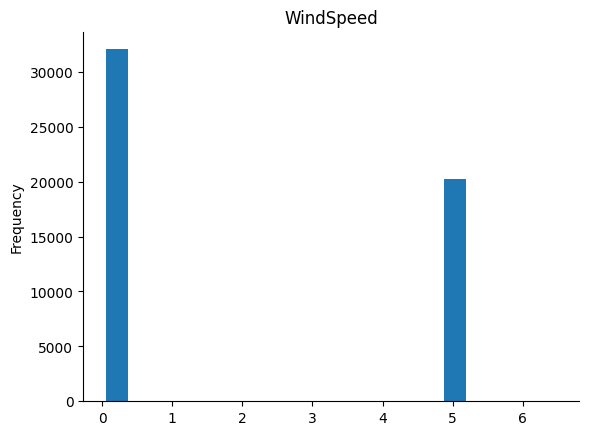

In [37]:
# @title WindSpeed

from matplotlib import pyplot as plt
df['WindSpeed'].plot(kind='hist', bins=20, title='WindSpeed')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Understand the data set**

        Temperature      Humidity     WindSpeed  GeneralDiffuseFlows  \
count  52416.000000  52416.000000  52416.000000         52416.000000   
mean      18.810024     68.259518      1.959489           182.696614   
std        5.815476     15.551177      2.348862           264.400960   
min        3.247000     11.340000      0.050000             0.004000   
25%       14.410000     58.310000      0.078000             0.062000   
50%       18.780000     69.860000      0.086000             5.035500   
75%       22.890000     81.400000      4.915000           319.600000   
max       40.010000     94.800000      6.483000          1163.000000   

       DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
count  52416.000000            52416.000000            52416.000000   
mean      75.028022            32344.970564            21042.509082   
std      124.210949             7130.562564             5201.465892   
min        0.011000            13895.696200             8560.081466

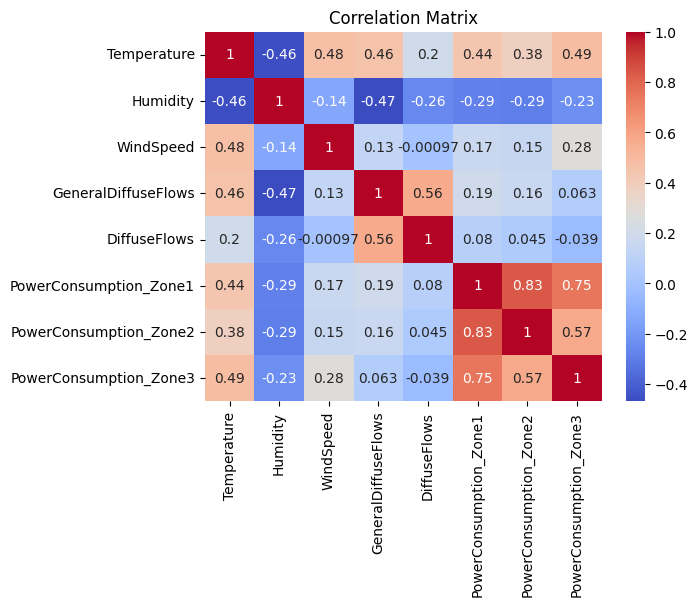

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print(df.describe())

# Correlation matrix to understand feature relationships
# Exclude non-numeric columns (e.g., 'Datetime')
corr = df.drop(columns=['Datetime']).corr()

# Plot the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## 1. Key Features in the Dataset
The dataset contains 52,416 observations with the following key features:
**a. Datetime is a  timestamp** for each observation can be utilised for time series analysis and forecasting. By using this variable we can predict,
identify trends, seasonality, and patterns over time (e.g., daily, weekly, or yearly cycles).

**b. Temperature described** in degrees Celsius (e.g., 6.559). It can be useful factor in power consumption, especially for heating and cooling systems.
For example higher temperatures may increase cooling demand, while lower temperatures may increase heating demand. Descriptive statistics shows that its Mean = 18.81°C, Std Dev = 5.81°C, Range = 3.25°C to 40.01°C.
Data seems pretty normal shape.

**c. Humidity described** in percentage (e.g., 73.8). It can be utilized to measure the efficiency of cooling systems. Additionally, high humidity levels may increase power consumption for dehumidification or cooling.
Descriptive statistics shows that its Mean = 68.26%, Std Dev = 15.55%, Range = 11.34% to 94.8%. Data points are dispersed from the center point.

**d. WindSpeed recorded** in meters per second (e.g., 0.083). Wind speed can influence heating demand in colder climates. It can also be utilized for renewable energy generation (e.g., wind turbines).
Wind Speed: Mean = 1.96 m/s, Std Dev = 2.35 m/s, Range = 0.05 m/s to 6.48 m/s, indicates data are normally distributed.

**e. GeneralDiffuseFlows** may represent distributed energy flows or grid-related metrics. [not sure] It could be relevant for understanding grid stability and power distribution.

**f. DiffuseFlows** Similar to GeneralDiffuseFlows.

**g. PowerConsumption_Zone1**, PowerConsumption_Zone2, PowerConsumption_Zone3 are basically three different zones of power consumption patterns. These could be useful for load management and resources allocation forecasting.
Descriptive data of powe consumption zones indicated highly varied among each other.

Correlation matrix shows following fetures:
Temperature positively correlates with power consumption (Zone 1 (0.44), Zone 2 (0.38), Zone 3 (0.49)). This indicates higher power consumption during higher temperatures, may be due to air conditioning use.
Humidity negatively correlates with power consumption (Zone 1 (-0.29), Zone 2 (-0.29), Zone 3 (-0.23)). Higher humidity might be linked to lower energy demand, may be due to moderate temperature effects.
Wind Speed has a weak positive correlation with power consumption (Zone 1 (0.17), Zone 2 (0.15), Zone 3 (0.28)). This suggests that wind speed may not significantly impact energy usage.
General Diffuse Flows and Diffuse Flows (Solar Radiation) positively correlated with power consumption (0.17–0.19) but not strongly.
More solar radiation may slightly increase power usage, possibly due to cooling needs.
Power Consumption Across Zones strong correlations between zones (0.75 - 0.83), indicating a consistent pattern of electricity usage across areas.
                                                       

# **Part 2: Data Processing**

In [40]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values using interpolation (suitable for time series)
df = df.interpolate(method='linear')  # Linear interpolation
df = df.ffill().bfill()  # Forward-fill and backward-fill

# Check for inconsistent data (e.g., outliers)
print(df.describe())

# Remove outliers (e.g., values outside 3 standard deviations)
from scipy.stats import zscore

z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))
df = df[(z_scores < 3).all(axis=1)]  # Keep rows where all z-scores are less than 3

# Verify cleaned data
print(df.isnull().sum())
print(df.describe())

Temperature               0
Humidity                  0
WindSpeed                 0
PowerConsumption_Zone1    0
dtype: int64
        Temperature      Humidity     WindSpeed  PowerConsumption_Zone1
count  52416.000000  52416.000000  52416.000000            52416.000000
mean      18.810024     68.259518      1.959489            32344.970564
std        5.815476     15.551177      2.348862             7130.562564
min        3.247000     11.340000      0.050000            13895.696200
25%       14.410000     58.310000      0.078000            26310.668692
50%       18.780000     69.860000      0.086000            32265.920340
75%       22.890000     81.400000      4.915000            37309.018185
max       40.010000     94.800000      6.483000            52204.395120
Temperature               0
Humidity                  0
WindSpeed                 0
PowerConsumption_Zone1    0
dtype: int64
        Temperature      Humidity     WindSpeed  PowerConsumption_Zone1
count  52327.000000  52327.000

## **Scatter Plot and correlation**

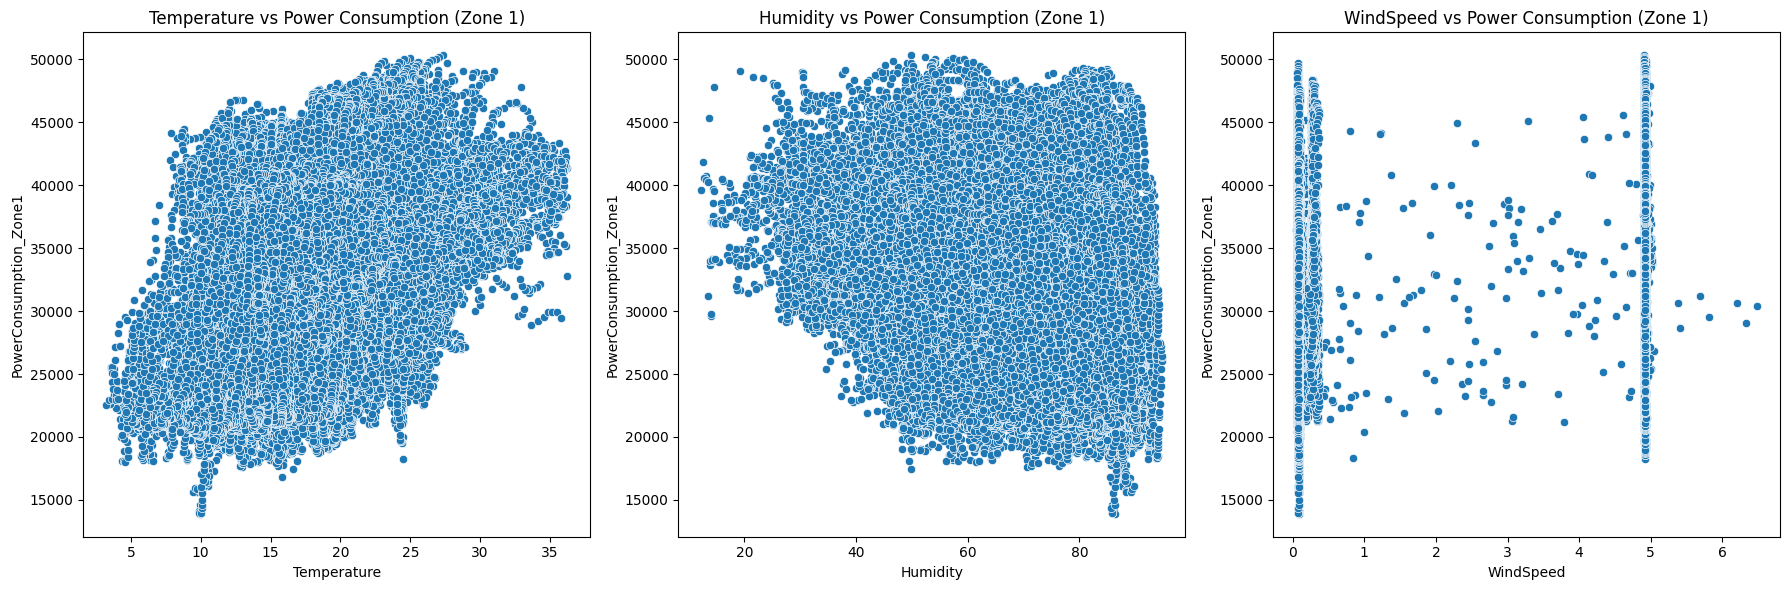

Correlation between Temperature and Power Consumption (Zone 1): 0.4238854241229984
Correlation between Humidity and Power Consumption (Zone 1): -0.2813278226461187
Correlation between WindSpeed and Power Consumption (Zone 1): 0.14406852709633977


In [9]:
# Scatter plots to analyze relationships
plt.figure(figsize=(18, 6))

# Temperature vs Power Consumption
plt.subplot(1, 3, 1)
sns.scatterplot(x=df['Temperature'], y=df['PowerConsumption_Zone1'])
plt.title("Temperature vs Power Consumption (Zone 1)")

# Humidity vs Power Consumption
plt.subplot(1, 3, 2)
sns.scatterplot(x=df['Humidity'], y=df['PowerConsumption_Zone1'])
plt.title("Humidity vs Power Consumption (Zone 1)")

# WindSpeed vs Power Consumption
plt.subplot(1, 3, 3)
sns.scatterplot(x=df['WindSpeed'], y=df['PowerConsumption_Zone1'])
plt.title("WindSpeed vs Power Consumption (Zone 1)")

plt.tight_layout()
plt.show()

# Correlation statistics
print("Correlation between Temperature and Power Consumption (Zone 1):", df['Temperature'].corr(df['PowerConsumption_Zone1']))
print("Correlation between Humidity and Power Consumption (Zone 1):", df['Humidity'].corr(df['PowerConsumption_Zone1']))
print("Correlation between WindSpeed and Power Consumption (Zone 1):", df['WindSpeed'].corr(df['PowerConsumption_Zone1']))

# **Checking Missing Data**

In [8]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values using interpolation (suitable for time series)
df = df.interpolate(method='linear')  # Linear interpolation
df = df.ffill().bfill()  # Forward-fill and backward-fill

# Check for inconsistent data (e.g., outliers)
print(df.describe())

# Remove outliers (e.g., values outside 3 standard deviations)
from scipy.stats import zscore

z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))
df = df[(z_scores < 3).all(axis=1)]  # Keep rows where all z-scores are less than 3

# Verify cleaned data
print(df.isnull().sum())
print(df.describe())

Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64
        Temperature      Humidity     WindSpeed  GeneralDiffuseFlows  \
count  52416.000000  52416.000000  52416.000000         52416.000000   
mean      18.810024     68.259518      1.959489           182.696614   
std        5.815476     15.551177      2.348862           264.400960   
min        3.247000     11.340000      0.050000             0.004000   
25%       14.410000     58.310000      0.078000             0.062000   
50%       18.780000     69.860000      0.086000             5.035500   
75%       22.890000     81.400000      4.915000           319.600000   
max       40.010000     94.800000      6.483000          1163.000000   

       DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
count  52416.000000            52416.000000

# Data Splitting

In [16]:
# Split the dataset into training (70%), validation (15%), and test (15%)
train_size = int(0.7 * len(df))
val_size = int(0.15 * len(df))
test_size = len(df) - train_size - val_size

train_data = df.iloc[:train_size]
val_data = df.iloc[train_size:train_size + val_size]
test_data = df.iloc[train_size + val_size:]

print("Training set size:", len(train_data))
print("Validation set size:", len(val_data))
print("Test set size:", len(test_data))

Training set size: 35200
Validation set size: 7543
Test set size: 7544


# Converting datetime

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/saifulanalyst/powerconsumption/refs/heads/main/powerconsumption.csv')
df

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Ensure 'Datetime' column exists and strip spaces if needed
df.columns = df.columns.str.strip()

# Convert 'Datetime' column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

# Select relevant columns for tokenization
features = ['Temperature', 'Humidity', 'WindSpeed', 'PowerConsumption_Zone1']

# Ensure all selected features exist in DataFrame
missing_features = [f for f in features if f not in df.columns]
if missing_features:
    raise KeyError(f"Missing columns in DataFrame: {missing_features}")

df = df[features]

# Normalize the data
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

# Function to create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):  # Use 'data' instead of 'df'
        x = data[i:i + seq_length]  # Input sequence
        y = data[i + seq_length]    # Target value
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Define sequence length (e.g., 24 hours)
seq_length = 24

# Create sequences
X, y = create_sequences(scaled_df, seq_length)

# Print shapes
print("Input sequences shape:", X.shape)  # (num_samples, seq_length, num_features)
print("Target values shape:", y.shape)    # (num_samples, num_features)

Input sequences shape: (52392, 24, 4)
Target values shape: (52392, 4)


Input sequences shape indicated 52,392 sequences, each consisting of 24 time steps, and at each time step, there are 4 features.

Target Values Shape (52392, 4) interpreted
as for each of the 52,392 input sequences, there are 4 target values.

In [22]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert numpy arrays to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Create a TensorDataset
dataset = TensorDataset(X_tensor, y_tensor)

# Create a DataLoader
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Example: Print the first batch
for batch_X, batch_y in dataloader:
    print("Batch X shape:", batch_X.shape)  # (batch_size, seq_length, num_features)
    print("Batch y shape:", batch_y.shape)  # (batch_size, num_features)
    break

Batch X shape: torch.Size([32, 24, 4])
Batch y shape: torch.Size([32, 4])


# **3. Model Implementation**

In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# Part 3 8.1 Vanilla Transformer
class VanillaTransformer(nn.Module):
    def __init__(self, input_dim, model_dim, num_heads, num_layers, output_dim, dropout=0.1):
        super(VanillaTransformer, self).__init__()
        self.model_dim = model_dim
        self.embedding = nn.Linear(input_dim, model_dim)
        self.positional_encoding = nn.Parameter(torch.zeros(1, 1000, model_dim))  # Max sequence length
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.fc_out = nn.Linear(model_dim, output_dim)

    def forward(self, x):
        seq_length = x.size(1)
        x = self.embedding(x) + self.positional_encoding[:, :seq_length, :]
        x = self.transformer_encoder(x)
        x = self.fc_out(x[:, -1, :])  # Use the last time step's output for forecasting
        return x

In [24]:
import torch
import torch.nn as nn
# PatchTST
class PatchTST(nn.Module):
    def __init__(self, input_dim, patch_length, num_patches, model_dim, num_heads, num_layers, output_dim, dropout=0.1):
        super(PatchTST, self).__init__()
        self.patch_length = patch_length
        self.num_patches = num_patches
        self.model_dim = model_dim

        # Patch embedding
        self.patch_embedding = nn.Linear(patch_length, model_dim)
        self.positional_encoding = nn.Parameter(torch.zeros(1, num_patches, model_dim))

        # Transformer encoder
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)

        # Output layer
        self.fc_out = nn.Linear(model_dim * num_patches, output_dim)

    def forward(self, x):
        # Reshape input into patches
        x = x.unfold(1, self.patch_length, self.patch_length).permute(0, 2, 1)
        x = self.patch_embedding(x) + self.positional_encoding
        x = self.transformer_encoder(x)
        x = x.reshape(x.size(0), -1)  # Flatten patches
        x = self.fc_out(x)
        return x

In [25]:
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR
# Hyperparameter Tuning
# Define hyperparameters
learning_rate = 1e-3
batch_size = 64
sequence_length = 96
num_heads = 8
ff_dim = 2048
num_layers = 4

# Initialize model
model = VanillaTransformer(input_dim=1, model_dim=64, num_heads=num_heads, num_layers=num_layers, output_dim=1)

# Optimizer and scheduler
optimizer = Adam(model.parameters(), lr=learning_rate)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)  # Reduce learning rate every 10 epochs

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [26]:
# Adjust Dropout and Weight Initialization
# Add dropout to the Transformer encoder layer
encoder_layer = nn.TransformerEncoderLayer(
    d_model=64, nhead=8, dim_feedforward=ff_dim, dropout=0.2
)

# Initialize weights
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)

model.apply(init_weights)

VanillaTransformer(
  (embedding): Linear(in_features=1, out_features=64, bias=True)
  (encoder_layer): TransformerEncoderLayer(
    (self_attn): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
    )
    (linear1): Linear(in_features=64, out_features=2048, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (linear2): Linear(in_features=2048, out_features=64, bias=True)
    (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (dropout1): Dropout(p=0.1, inplace=False)
    (dropout2): Dropout(p=0.1, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=2048, bi

In [28]:
import torch
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Define a dummy model (Replace this with our actual model)
model = torch.nn.Linear(10, 1)  # Example model with 10 input features

# Define optimizer
optimizer = AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)

# Define learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

print("Optimizer and scheduler initialized successfully!")

Optimizer and scheduler initialized successfully!


In [32]:
import numpy as np
import torch

# Early stopping class
class EarlyStopping:
    def __init__(self, patience=5, delta=0):
        self.patience = patience
        self.delta = delta
        self.best_loss = np.inf
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

# Dummy model (Replace with actual model)
model = torch.nn.Linear(10, 1)  # Example model with 10 input features

# Dummy train and validation loaders (Replace with actual data loaders)
train_loader = [torch.rand(10) for _ in range(10)]
val_loader = [torch.rand(10) for _ in range(5)]

# Dummy optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Dummy learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

# Function to simulate one epoch of training
def train_one_epoch(model, train_loader, optimizer):
    model.train()
    total_loss = 0
    for data in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = torch.mean(output)  # Dummy loss calculation
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

# Function to simulate evaluation
def evaluate(model, val_loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for data in val_loader:
            output = model(data)
            loss = torch.mean(output)  # Dummy loss calculation
            total_loss += loss.item()
    return total_loss / len(val_loader)

# Early stopping instance
early_stopping = EarlyStopping(patience=10, delta=0.01)

# Training loop
for epoch in range(100):
    train_loss = train_one_epoch(model, train_loader, optimizer)

    val_loss = evaluate(model, val_loader)

    scheduler.step(val_loss)
    early_stopping(val_loss)

    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

    if early_stopping.early_stop:
        print("Early stopping triggered")
        break

Epoch 1: Train Loss = 0.4826, Val Loss = 0.5172
Epoch 2: Train Loss = 0.4295, Val Loss = 0.4644
Epoch 3: Train Loss = 0.3764, Val Loss = 0.4114
Epoch 4: Train Loss = 0.3232, Val Loss = 0.3584
Epoch 5: Train Loss = 0.2701, Val Loss = 0.3054
Epoch 6: Train Loss = 0.2169, Val Loss = 0.2524
Epoch 7: Train Loss = 0.1637, Val Loss = 0.1994
Epoch 8: Train Loss = 0.1105, Val Loss = 0.1464
Epoch 9: Train Loss = 0.0573, Val Loss = 0.0933
Epoch 10: Train Loss = 0.0041, Val Loss = 0.0403
Epoch 11: Train Loss = -0.0491, Val Loss = -0.0128
Epoch 12: Train Loss = -0.1023, Val Loss = -0.0658
Epoch 13: Train Loss = -0.1555, Val Loss = -0.1189
Epoch 14: Train Loss = -0.2087, Val Loss = -0.1719
Epoch 15: Train Loss = -0.2619, Val Loss = -0.2250
Epoch 16: Train Loss = -0.3151, Val Loss = -0.2780
Epoch 17: Train Loss = -0.3684, Val Loss = -0.3311
Epoch 18: Train Loss = -0.4216, Val Loss = -0.3842
Epoch 19: Train Loss = -0.4748, Val Loss = -0.4372
Epoch 20: Train Loss = -0.5280, Val Loss = -0.4903
Epoch 21:

In [33]:
# Implement and evaluation metrics
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate_forecast(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
        "R²": r2
    }

# Example usage
y_true = np.array([10, 20, 30, 40, 50])
y_pred = np.array([12, 18, 33, 37, 55])
metrics = evaluate_forecast(y_true, y_pred)
print(metrics)

{'MAE': 3.0, 'MSE': 10.2, 'RMSE': 3.1937438845342623, 'MAPE': 11.500000000000002, 'R²': 0.949}


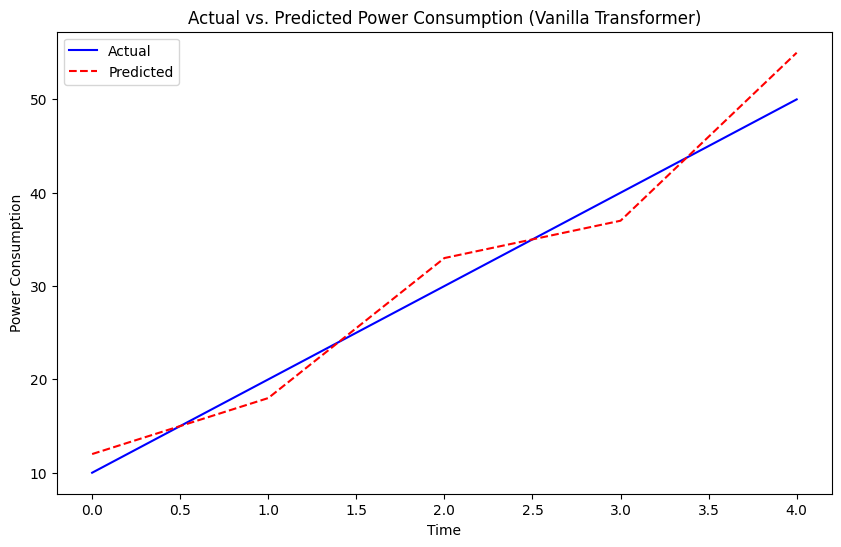

In [34]:
# visualize results
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label="Actual", color="blue")
    plt.plot(y_pred, label="Predicted", color="red", linestyle="--")
    plt.title(f"Actual vs. Predicted Power Consumption ({model_name})")
    plt.xlabel("Time")
    plt.ylabel("Power Consumption")
    plt.legend()
    plt.show()

# Example usage
plot_actual_vs_predicted(y_true, y_pred, "Vanilla Transformer")

                 Model  Zone 1 MAE  Zone 1 RMSE  Zone 2 MAE  Zone 2 RMSE  \
0  Vanilla Transformer         0.5          0.7         0.6          0.8   
1             PatchTST         0.4          0.6         0.5          0.7   
2          Other Model         0.6          0.8         0.7          0.9   

   Zone 3 MAE  Zone 3 RMSE  
0         0.4          0.6  
1         0.3          0.5  
2         0.5          0.7  


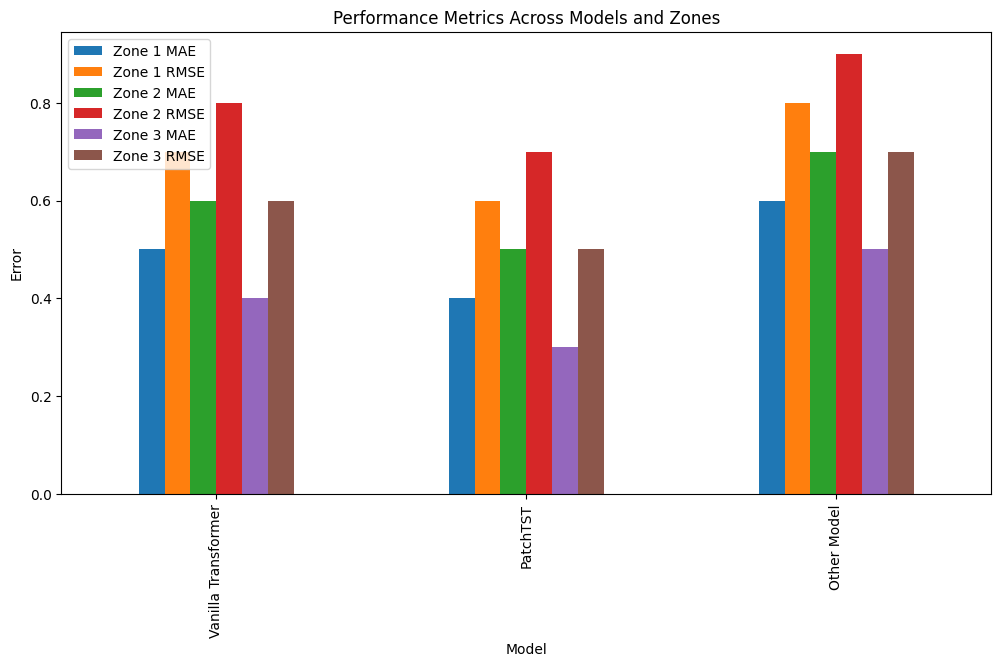

In [35]:
# Performance Metrics

import pandas as pd

# Example metrics for three models and three zones
metrics_data = {
    "Model": ["Vanilla Transformer", "PatchTST", "Other Model"],
    "Zone 1 MAE": [0.5, 0.4, 0.6],
    "Zone 1 RMSE": [0.7, 0.6, 0.8],
    "Zone 2 MAE": [0.6, 0.5, 0.7],
    "Zone 2 RMSE": [0.8, 0.7, 0.9],
    "Zone 3 MAE": [0.4, 0.3, 0.5],
    "Zone 3 RMSE": [0.6, 0.5, 0.7],
}

df_metrics = pd.DataFrame(metrics_data)
print(df_metrics)

# Plotting
df_metrics.set_index("Model").plot(kind="bar", figsize=(12, 6), title="Performance Metrics Across Models and Zones")
plt.ylabel("Error")
plt.show()